# Exploratory Data Analysis 

### S & P WebApp - proof of concept

> Data was obtained from scrapping table in [Wikipedia](https://en.wikipedia.org/wiki/List_of_S%26P_500_companies) 

In [35]:
# Import libraries
import pandas as pd

In [5]:
# Custom function to get data from source
def get_data():
    url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
    html = pd.read_html(url, header=0)
    df = html[0]
    return df

### Preliminary data overview

In [6]:
# view dataframe
df = get_data()
df.head(10)

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
5,ATVI,Activision Blizzard,Communication Services,Interactive Home Entertainment,"Santa Monica, California",2015-08-31,718877,2008
6,ADM,ADM,Consumer Staples,Agricultural Products & Services,"Chicago, Illinois",1957-03-04,7084,1902
7,ADBE,Adobe Inc.,Information Technology,Application Software,"San Jose, California",1997-05-05,796343,1982
8,ADP,ADP,Industrials,Human Resource & Employment Services,"Roseland, New Jersey",1981-03-31,8670,1949
9,AAP,Advance Auto Parts,Consumer Discretionary,Automotive Retail,"Raleigh, North Carolina",2015-07-09,1158449,1932


In [15]:
df.shape   #There are 503 rows and 8 columns

(503, 8)

In [10]:
# list of different sectors

data_sectors = df['GICS Sector'].unique()
data_sectors

array(['Industrials', 'Health Care', 'Information Technology',
       'Communication Services', 'Consumer Staples',
       'Consumer Discretionary', 'Utilities', 'Financials', 'Materials',
       'Real Estate', 'Energy'], dtype=object)

In [11]:
len(data_sectors)

11

### Group data by sector name

In [16]:
df_sectors = df.groupby('GICS Sector')  

In [17]:
df_sectors.first()   # Get first of grouped data

,Symbol,Security,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
GICS Sector,,,,,,,
Communication Services,ATVI,Activision Blizzard,Interactive Home Entertainment,"Santa Monica, California",2015-08-31,718877,2008
Consumer Discretionary,AAP,Advance Auto Parts,Automotive Retail,"Raleigh, North Carolina",2015-07-09,1158449,1932
Consumer Staples,ADM,ADM,Agricultural Products & Services,"Chicago, Illinois",1957-03-04,7084,1902
Energy,APA,APA Corporation,Oil & Gas Exploration & Production,"Houston, Texas",1997-07-28,1841666,1954
Financials,AFL,Aflac,Life & Health Insurance,"Columbus, Georgia",1999-05-28,4977,1955
Health Care,ABT,Abbott,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
Industrials,MMM,3M,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
Information Technology,ACN,Accenture,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
Materials,APD,Air Products and Chemicals,Industrial Gases,"Allentown, Pennsylvania",1985-04-30,2969,1940


In [18]:
# statistical insights of sector data
df_sectors.describe()

CIK                                                   \
                       count          mean            std      min        25%   
GICS Sector                                                                     
Communication Services  23.0  1.131438e+06  500381.710118  29989.0  773272.50   
Consumer Discretionary  53.0  8.921519e+05  436997.750747  37996.0  789570.00   
Consumer Staples        37.0  4.310338e+05  577319.558536   7084.0   27419.00   
Energy                  23.0  8.423255e+05  640873.249366   4447.0   97594.00   
Financials              72.0  6.810251e+05  540006.059890   4962.0   73085.75   
Health Care             65.0  8.444450e+05  546653.710569   1800.0  313616.00   
Industrials             74.0  6.544831e+05  577419.498004   4281.0   76590.50   
Information Technology  67.0  9.155848e+05  511999.789800   2488.0  759324.00   
Materials               29.0  8.433121e+05  687449.351971   2969.0   73309.00   
Real Estate             30.0  9.530729e+05  379707.226998  34903.0  885852.50   
Utilities               30.0  8.457124e+05  460276.348204   4904.0  737178.50   

                                                          
                              50%         75%        max  
GICS Sector                                               
Communication Services  1166691.0  1564708.00  1754301.0  
Consumer Discretionary   920760.0  1158449.00  1590895.0  
Consumer Staples          77476.0   909832.00  1679273.0  
Energy                  1035002.0  1447738.50  1841666.0  
Financials               825514.0  1128969.25  1633917.0  
Health Care              885725.0  1110803.00  1932393.0  
Industrials              726033.0  1059631.25  1783180.0  
Information Technology   896878.0  1334503.00  1730168.0  
Materials                916076.0  1396009.00  1755672.0  
Real Estate             1027311.5  1069002.75  1705696.0  
Utilities                898492.5  1043948.50  1868275.0

### Examine data for a particular sector - Industrials

In [19]:
df_sectors.get_group("Industrials")

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
8,ADP,ADP,Industrials,Human Resource & Employment Services,"Roseland, New Jersey",1981-03-31,8670,1949
15,ALK,Alaska Air Group,Industrials,Passenger Airlines,"SeaTac, Washington",2016-05-13,766421,1985
19,ALLE,Allegion,Industrials,Building Products,"New York City, New York",2013-12-02,1579241,1908
...,...,...,...,...,...,...,...,...
470,VRSK,Verisk,Industrials,Research & Consulting Services,"Jersey City, New Jersey",2015-10-08,1442145,1971
478,WAB,Wabtec,Industrials,Construction Machinery & Heavy Transportation ...,"Pittsburgh, Pennsylvania",2019-02-27,943452,1999 (1869)
482,WM,Waste Management,Industrials,Environmental & Facilities Services,"Houston, Texas",NaN,823768,1968
494,GWW,W. W. Grainger,Industrials,Industrial Machinery & Supplies & Components,"Lake Forest, Illinois",1981-06-30,277135,1927


 # Second part - Compare and retrieve stock price data from YFinance

In [23]:
! pip install yfinance

  Using cached yfinance-0.2.27-py2.py3-none-any.whl (63 kB)
  Using cached frozendict-2.3.8-cp39-cp39-win_amd64.whl (35 kB)
  Using cached html5lib-1.1-py2.py3-none-any.whl (112 kB)


In [24]:
import yfinance as yf

In [26]:
# Get symbols of company symbols from Wikipedia S & P

list(df.Symbol)

['MMM',
 'AOS',
 'ABT',
 'ABBV',
 'ACN',
 'ATVI',
 'ADM',
 'ADBE',
 'ADP',
 'AAP',
 'AES',
 'AFL',
 'A',
 'APD',
 'AKAM',
 'ALK',
 'ALB',
 'ARE',
 'ALGN',
 'ALLE',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AMCR',
 'AMD',
 'AEE',
 'AAL',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'ABC',
 'AME',
 'AMGN',
 'APH',
 'ADI',
 'ANSS',
 'AON',
 'APA',
 'AAPL',
 'AMAT',
 'APTV',
 'ACGL',
 'ANET',
 'AJG',
 'AIZ',
 'T',
 'ATO',
 'ADSK',
 'AZO',
 'AVB',
 'AVY',
 'AXON',
 'BKR',
 'BALL',
 'BAC',
 'BBWI',
 'BAX',
 'BDX',
 'WRB',
 'BRK.B',
 'BBY',
 'BIO',
 'TECH',
 'BIIB',
 'BLK',
 'BK',
 'BA',
 'BKNG',
 'BWA',
 'BXP',
 'BSX',
 'BMY',
 'AVGO',
 'BR',
 'BRO',
 'BF.B',
 'BG',
 'CHRW',
 'CDNS',
 'CZR',
 'CPT',
 'CPB',
 'COF',
 'CAH',
 'KMX',
 'CCL',
 'CARR',
 'CTLT',
 'CAT',
 'CBOE',
 'CBRE',
 'CDW',
 'CE',
 'CNC',
 'CNP',
 'CDAY',
 'CF',
 'CRL',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CLX',
 'CME',
 'CMS',
 'KO',
 'CTSH',
 'CL',

#### Retrieve stock price data from yfinance and add them to the dataframe

In [29]:
data_yf = yf.download(tickers=list(df.Symbol), period='ytd', interval='1d', 
                      group_by='ticker', auto_adjust=True, prepost=True, threads=True, proxy=None)

[*********************100%***********************]  503 of 503 completed


2 Failed downloads:
['BRK.B']: Exception('%ticker%: No data found, symbol may be delisted')
['BF.B']: Exception('%ticker%: No price data found, symbol may be delisted (period=ytd)')


In [31]:
data_yf

BDX                                               \
                  Open        High         Low       Close   Volume   
Date                                                                  
2023-01-03  260.699919  260.699919  251.826631  254.268265  1002000   
2023-01-04  256.074677  256.590785  254.317896  256.164001  1443200   
2023-01-05  255.727304  256.451868  252.908501  253.404770  1575200   
2023-01-06  254.963060  257.583343  252.719915  257.404694  1141200   
2023-01-09  258.010148  258.010148  250.417226  250.566101  1337600   
...                ...         ...         ...         ...      ...   
2023-08-03  275.339996  277.260010  265.709991  268.700012  2143100   
2023-08-04  268.250000  274.709991  267.149994  270.790009  1521600   
2023-08-07  271.399994  277.190002  271.049988  275.220001  1477000   
2023-08-08  276.269989  282.500000  274.329987  281.100006  2522900   
2023-08-09  279.059998  284.480011  279.059998  281.529999  2048600   

                  WRK                                            ...  \
                 Open       High        Low      Close   Volume  ...   
Date                                                             ...   
2023-01-03  34.383215  34.685165  34.120227  34.558540  1127900  ...   
2023-01-04  34.909189  35.605620  34.831265  35.435165  1948300  ...   
2023-01-05  35.016336  35.201400  34.344254  34.470879  1356300  ...   
2023-01-06  34.870230  35.931922  34.655946  35.776077  2462900  ...   
2023-01-09  36.126726  36.828028  35.547177  35.698154  3345200  ...   
...               ...        ...        ...        ...      ...  ...   
2023-08-03  33.632038  35.348362  32.843320  34.276897  7024900  ...   
2023-08-04  34.465396  34.767981  33.602270  33.622112  4025300  ...   
2023-08-07  33.711402  34.445554  33.701483  34.147923  2975700  ...   
2023-08-08  33.810613  34.584446  33.532823  34.514999  2544000  ...   
2023-08-09  34.520000  34.740002  34.200001  34.220001  1810100  ...   

                    C                                                     GS  \
                 Open       High        Low      Close    Volume        Open   
Date                                                                           
2023-01-03  44.297949  45.266210  44.094615  44.326996  19564000  340.451408   
2023-01-04  45.062876  46.031137  44.869223  45.469543  21507200  342.944458   
2023-01-05  45.217796  45.469543  44.510966  45.266209  12314900  339.219677   
2023-01-06  45.566372  46.176374  45.130654  45.808437  16736300  342.225112   
2023-01-09  46.370025  46.786378  45.963358  46.031136  16745500  346.738198   
...               ...        ...        ...        ...       ...         ...   
2023-08-03  45.442755  45.937020  45.185735  45.680000  13467100  349.989990   
2023-08-04  45.730000  46.689999  45.560001  45.709999  18320300  353.339996   
2023-08-07  45.950001  46.240002  45.630001  45.830002  16972000  355.399994   
2023-08-08  45.020000  45.230000  44.139999  45.160000  18524500  351.700012   
2023-08-09  45.020000  45.189999  44.410000  44.439999  13951700  346.820007   

                                                         
                  High         Low       Close   Volume  
Date                                                     
2023-01-03  343.506116  337.800713  341.160889  1589700  
2023-01-04  345.191141  340.037552  342.619293  1881000  
2023-01-05  340.096687  335.169749  338.736847  1397800  
2023-01-06  343.900283  335.967925  342.993713  3097800  
2023-01-09  351.290684  344.392971  347.841827  1989000  
...                ...         ...         ...      ...  
2023-08-03  355.209991  348.619995  353.160004  1840400  
2023-08-04  358.730011  352.510010  353.220001  1724700  
2023-08-07  357.670013  353.920013  355.559998  1260300  
2023-08-08  352.000000  342.029999  348.260010  1917300  
2023-08-09  348.459991  342.489990  342.690002  1326000  

[151 rows x 2517 columns]

### Specific data of Companies using their symbols
> Here we look at GE

In [33]:
data_yf['GE']   # General Electric

,Open,High,Low,Close,Volume
Date,,,,,
2023-01-03,65.503596,66.314112,65.106134,66.228386,8204933
2023-01-04,68.296139,70.083153,66.638898,70.083153,16784600
2023-01-05,69.783663,71.430918,68.885159,71.171349,12770200
2023-01-06,71.890150,72.209617,70.632245,71.820267,10389500
2023-01-09,71.880166,73.786991,71.840232,72.549049,7572900
...,...,...,...,...,...
2023-08-03,111.830002,113.169998,111.550003,112.360001,3469600
2023-08-04,112.820000,113.870003,111.800003,113.059998,4882100
2023-08-07,113.540001,114.980003,113.540001,114.730003,3304800


In [38]:
# Include dates as one of the columns

data_GE = pd.DataFrame(data_yf['GE'].Close)
data_GE['Date'] = data_GE.index

data_GE

,Close,Date
Date,,
2023-01-03,66.228386,2023-01-03
2023-01-04,70.083153,2023-01-04
2023-01-05,71.171349,2023-01-05
2023-01-06,71.820267,2023-01-06
2023-01-09,72.549049,2023-01-09
...,...,...
2023-08-03,112.360001,2023-08-03
2023-08-04,113.059998,2023-08-04
2023-08-07,114.730003,2023-08-07


## Plot closing price of specified company symbol i.e. GE

Text(0, 0.5, 'Closing Price')

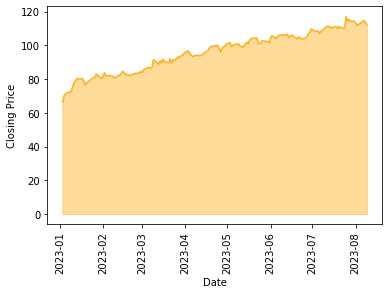

In [40]:
import matplotlib.pyplot as plt
plt.fill_between(data_GE.Date, data_GE.Close, color='orange', alpha=0.4)
plt.plot(data_GE.Date, data_GE.Close, color='orange', alpha=0.8)
plt.xticks(rotation=90)
plt.xlabel("Date")
plt.ylabel("Closing Price")

### Function to handle repetitions

In [42]:
def plot_price(symbol):
    df = pd.DataFrame(data_yf[symbol].Close)
    df['Date'] = df.index
    plt.fill_between(df.Date, df.Close, color='orange', alpha=0.4)
    plt.plot(df.Date, df.Close, color='orange', alpha=0.8)
    plt.xticks(rotation=90)
    plt.title(symbol, fontweight="bold")
    plt.xlabel("Date", fontweight='bold')
    plt.ylabel("Closing Price Trend", fontweight='bold')
    return plt.show()

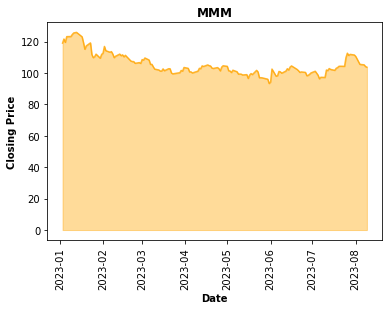

In [45]:
plot_price('MMM')

### Display first 10 results

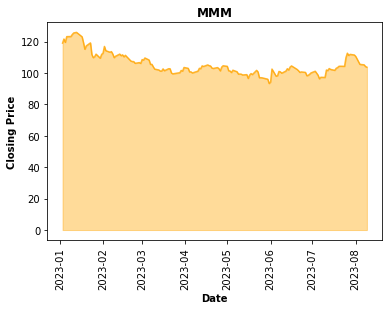

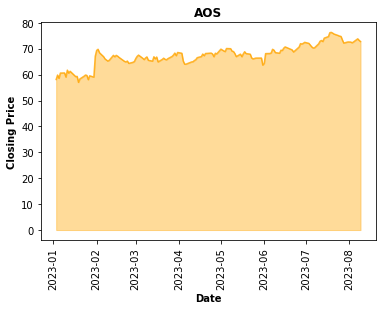

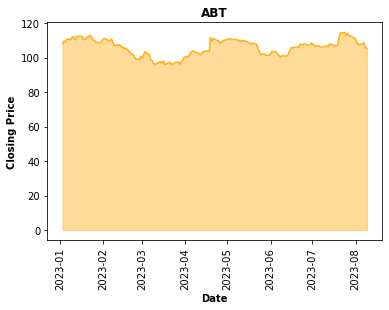

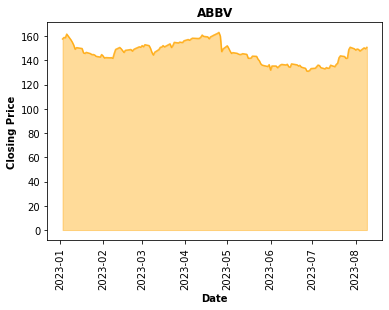

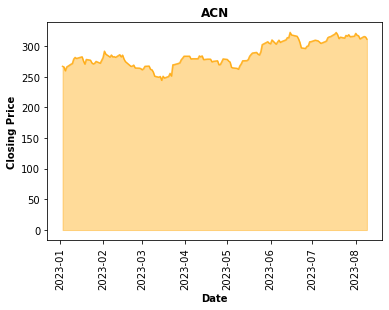

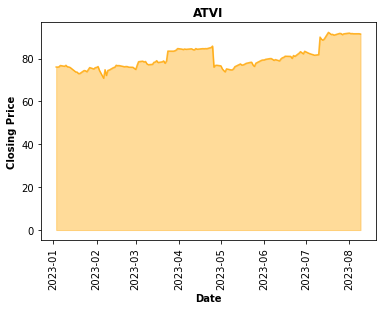

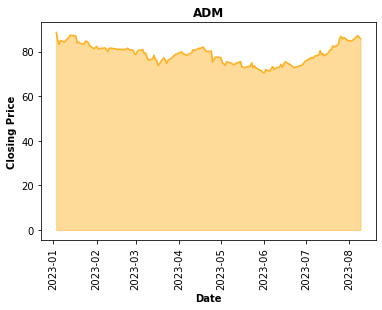

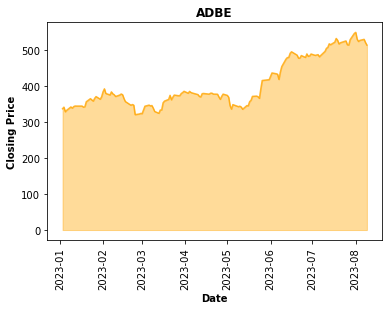

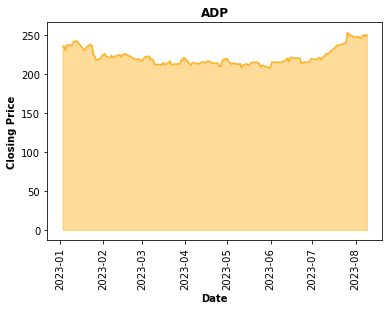

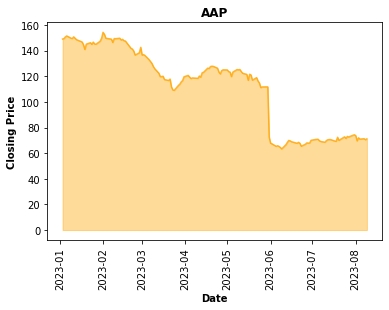

In [47]:
for i in list(df.Symbol)[:10]:
     plot_price(i)